In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import calendar
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 2000)

In [5]:
def rsi(series: pd.Series, periods = 14) -> pd.Series:
    delta = series.diff()
   
    #Initiate Upper and Lower
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)

    ma_up = up.ewm(com = periods - 1, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, min_periods = periods).mean()

    rsi = ma_up/ma_down
    rsi = 100 - (100/(1+rsi))
    return rsi

[*********************100%%**********************]  1 of 1 completed


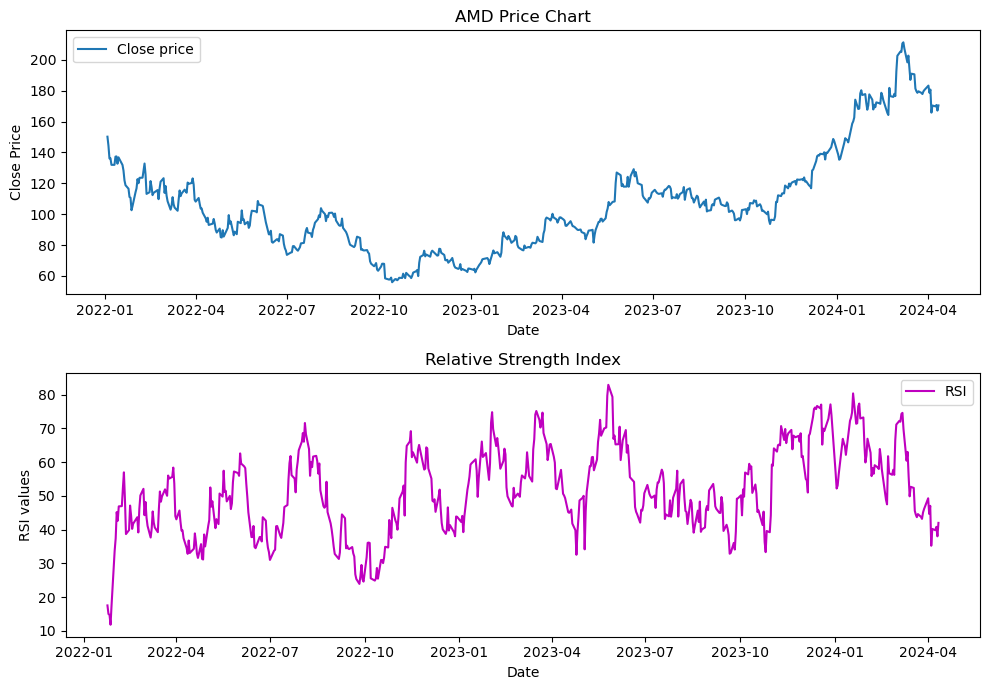

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2022-01-03,145.139999,151.649994,145.020004,150.240005,150.240005,59396600,NaN
2022-01-04,151.009995,152.419998,140.699997,144.419998,144.419998,80200500,NaN
2022-01-05,142.820007,143.759995,135.289993,136.149994,136.149994,65403200,NaN
2022-01-06,136.190002,138.000000,131.770004,136.229996,136.229996,64802900,NaN
2022-01-07,136.279999,137.440002,131.130005,132.000000,132.000000,58441100,NaN
2022-01-10,129.080002,132.419998,125.029999,132.000000,132.000000,84671300,NaN
2022-01-11,133.449997,138.990005,131.589996,137.309998,137.309998,77153900,NaN
2022-01-12,138.589996,140.570007,135.770004,137.470001,137.470001,69669600,NaN
2022-01-13,139.440002,141.250000,131.809998,132.740005,132.740005,76618100,NaN


In [8]:
#Get Stock Data and Test
data = yf.download('AMD', start = '2022-1-1', end= '2024-4-12')

# Call RSI function from the talib library to calculate RSI
data['RSI'] = rsi(data['Close'])

# Plotting the Price Series chart and the RSI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('AMD Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')

plt.plot(data['RSI'], 'm', label='RSI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()
data